In [0]:
'''Trains a simple convnet on the MNIST dataset.


'''

import tensorflow as tf

from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Functional API
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [0]:
import os
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

import IPython

In [61]:

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) =  fashion_mnist.load_data()

if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
def showImage(img, ax=plt, cmap=None):
  # Some datasets (e.g., MNIST) have only 1 channel instead of 3
  if img.shape[-1] == 1:
    img = img[:,:, 0]
    cmap = "gray"
  
  
  if cmap is None:
    _= ax.imshow(img)
  else:
    _= ax.imshow(img, cmap=cmap)


    
   
def showTrain(xtrain, ytrain, num=5):
  #  ytrain is OHE
  num_classes = ytrain.shape[-1]

  fig = plt.figure(figsize=(12,12))
  for thisClass in range(0, num_classes):
    xtrain_thisClass = xtrain[ ytrain[:,thisClass] == 1]

    for i in range(0,num):
      ax = fig.add_subplot(num_classes, num, thisClass * num + i +1)
      showImage(xtrain_thisClass[i], ax)

      # ax.set_title(y[i])
      # ax.set_xlabel( idxs[i] )
      ax.set_xticks([])
      ax.set_yticks([])
  

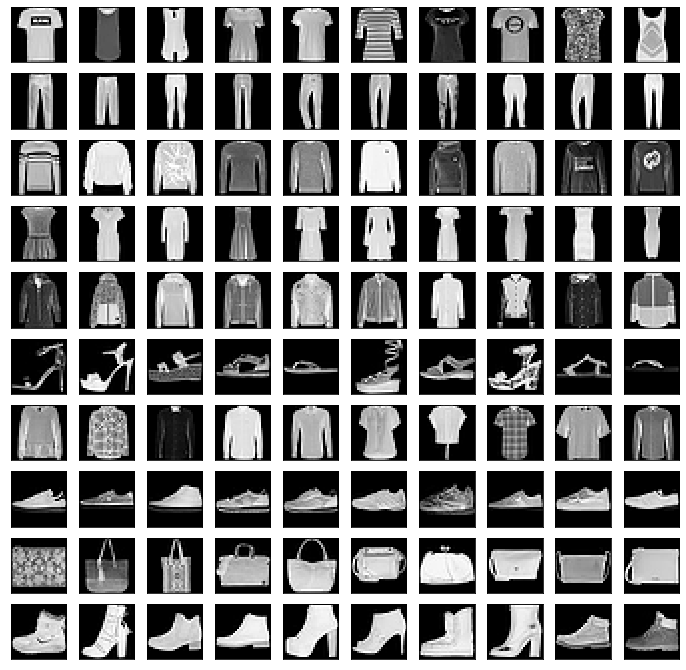

In [63]:
showTrain(x_train, y_train, num=10)

In [0]:
def createModel():
  model = Sequential( [ 
                       Conv2D(32, kernel_size=(3, 3),
                              activation='relu',
                              input_shape=input_shape),
                       Conv2D(64, (3, 3), activation='relu'),
                       MaxPooling2D(pool_size=(2, 2)),
                       Dropout(0.25),
                       Flatten(),
                       Dense(128, activation='relu'),
                       Dropout(0.5),
                       Dense(num_classes, activation='softmax')
  ]
)

  return model

In [0]:
def createModel1():
  model = Sequential( [ 
                       Conv2D(32, kernel_size=(3, 3),
                              activation='relu',
                              input_shape=input_shape),
                       Flatten(),
                       Dense(128, activation='relu'),
                       Dropout(0.5),
                       Dense(num_classes, activation='softmax')
  ]
)

  return model

In [0]:
def createModel(input_shape, num_filters=[32], num_classes=10):
  # Create first layer: needs input_spec
  model = Sequential( [ 
                        Conv2D(num_filters[0], kernel_size=(3, 3),
                                activation='relu',
                              input_shape=input_shape) 
                        ]
                    )
  
  # Add more Conv/Pooling layers
  for i in range(1, len(num_filters)):
    print("Adding Conv block with {n:d} filters".format(n=num_filters[i]))
    model.add( Conv2D(num_filters[i], (3, 3), activation='relu'))
    model.add( MaxPooling2D(pool_size=(2, 2)) )
    model.add( Dropout(0.25))

  # Add tail
  model.add( Flatten() )
  model.add( Dense(128, activation='relu') )
  model.add( Dropout(0.5) )
  model.add( Dense(num_classes, activation='softmax') )

  return model
             

In [67]:

mnist_conv_model = createModel(input_shape, num_filters=[32, 64, 32], num_classes=num_classes)
modelName="mnist_conv"

mnist_conv_model.compile(loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=.005, patience=2, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

callbacks = [ es_callback,
              ModelCheckpoint(filepath=modelName + ".ckpt", monitor='acc', save_best_only=True)
          ]



Adding Conv block with 64 filters
Adding Conv block with 32 filters


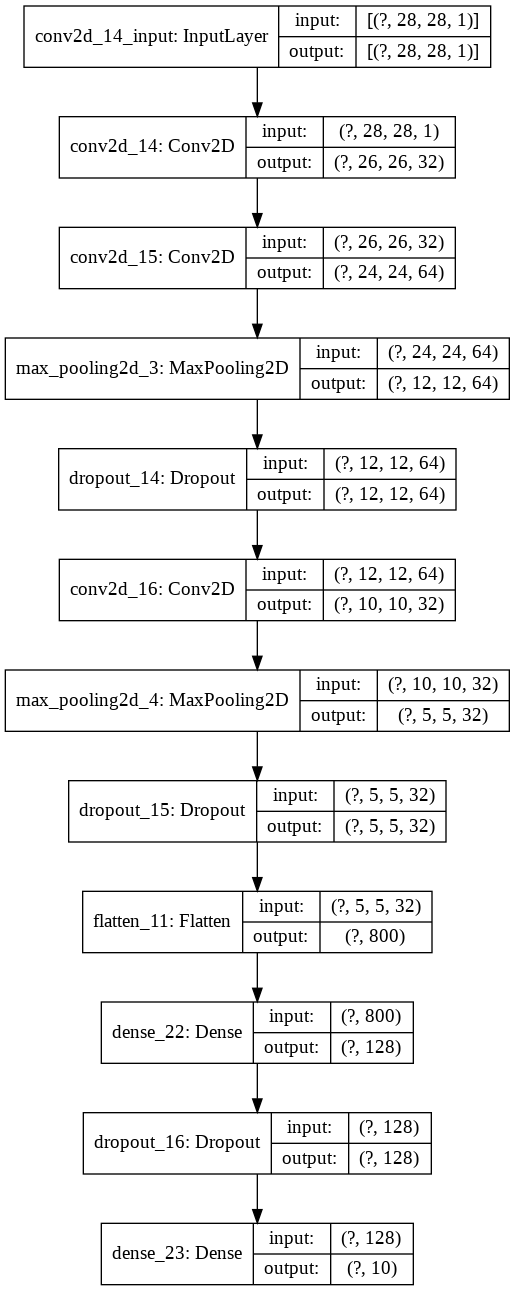

In [68]:
plot_model(mnist_conv_model, "mnist_conv_model.png", show_shapes=True)
IPython.display.Image(  "mnist_conv_model.png")

In [69]:
mnist_conv_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=callbacks,
          validation_data=(x_test, y_test))
score = mnist_conv_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 155us/sample - loss: 0.5363 - acc: 0.8045 - val_loss: 0.4098 - val_acc: 0.8506
Epoch 2/12
60000/60000 [==============================] - 8s 128us/sample - loss: 0.3163 - acc: 0.8847 - val_loss: 0.3188 - val_acc: 0.8852
Epoch 3/12
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2593 - acc: 0.9048 - val_loss: 0.2875 - val_acc: 0.8962
Epoch 4/12
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2270 - acc: 0.9168 - val_loss: 0.2638 - val_acc: 0.9035
Epoch 5/12
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2017 - acc: 0.9255 - val_loss: 0.2495 - val_acc: 0.9082
Epoch 6/12
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1830 - acc: 0.9331 - val_loss: 0.2515 - val_acc: 0.9071
Epoch 7/12
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1649 - acc: 0.9393 - val_l

In [0]:
mnist_conv_model.save(os.path.join("/tmp", modelName + ".h5"))

In [71]:
model = mnist_conv_model
layer_dict = dict([(layer.name, layer) for layer in model.layers[0:]])
layer_dict.keys()

dict_keys(['conv2d_14', 'conv2d_15', 'max_pooling2d_3', 'dropout_14', 'conv2d_16', 'max_pooling2d_4', 'dropout_15', 'flatten_11', 'dense_22', 'dropout_16', 'dense_23'])

In [0]:
tf.keras.backend.set_learning_phase(0)





# CNN Filter Visualization

Derived from Keras examples https://github.com/keras-team/keras/blob/master/examples/conv_filter_visualization.py

In [0]:
"""
#Visualization of the filters of VGG16, via gradient ascent in input space.

This script can run on CPU in a few minutes.

Results example: ![Visualization](http://i.imgur.com/4nj4KjN.jpg)
"""
from __future__ import print_function

import time
import numpy as np
from PIL import Image as pil_image
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras import layers
from tensorflow.keras.applications import vgg16
from tensorflow.keras import backend as K

import pdb


In [0]:
def normalize(x):
    """utility function to normalize a tensor.

    # Arguments
        x: An input tensor.

    # Returns
        The normalized input tensor.
    """
    return x / (tf.keras.backend.sqrt(tf.keras.backend.mean(tf.keras.backend.square(x))) + tf.keras.backend.epsilon())


def deprocess_image(x):
    """utility function to convert a float array into a valid uint8 image.

    # Arguments
        x: A numpy-array representing the generated image.

    # Returns
        A processed numpy-array, which could be used in e.g. imshow.
    """
    # normalize tensor: center on 0., ensure std is 0.25
    x -= x.mean()
    x /= (x.std() + tf.keras.backend.epsilon())
    x *= 0.25

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if tf.keras.backend.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x


def process_image(x, former):
    """utility function to convert a valid uint8 image back into a float array.
       Reverses `deprocess_image`.

    # Arguments
        x: A numpy-array, which could be used in e.g. imshow.
        former: The former numpy-array.
                Need to determine the former mean and variance.

    # Returns
        A processed numpy-array representing the generated image.
    """
    if tf.keras.backend.image_data_format() == 'channels_first':
        x = x.transpose((2, 0, 1))
    return (x / 255 - 0.5) * 4 * former.std() + former.mean()


def visualize_layer(model,
                    layer_name,
                    step=1.,
                    epochs=15,
                    upscaling_steps=9,
                    upscaling_factor=1.2,
                    output_dim=(412, 412),
                    filter_range=(0, None)):
    """Visualizes the most relevant filters of one conv-layer in a certain model.

    # Arguments
        model: The model containing layer_name.
        layer_name: The name of the layer to be visualized.
                    Has to be a part of model.
        step: step size for gradient ascent.
        epochs: Number of iterations for gradient ascent.
        upscaling_steps: Number of upscaling steps.
                         Starting image is in this case (80, 80).
        upscaling_factor: Factor to which to slowly upgrade
                          the image towards output_dim.
        output_dim: [img_width, img_height] The output image dimensions.
        filter_range: Tupel[lower, upper]
                      Determines the to be computed filter numbers.
                      If the second value is `None`,
                      the last filter will be inferred as the upper boundary.
    """

    def _generate_filter_image(input_img,
                               layer_output,
                               filter_index):
        """Generates image for one particular filter.

        # Arguments
            input_img: The input-image Tensor.
            layer_output: The output-image Tensor.
            filter_index: The to be processed filter number.
                          Assumed to be valid.

        #Returns
            Either None if no image could be generated.
            or a tuple of the image (array) itself and the last loss.
        """
        s_time = time.time()

        # we build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        if tf.keras.backend.image_data_format() == 'channels_first':
            loss = tf.keras.backend.mean(layer_output[:, filter_index, :, :])
        else:
            loss = tf.keras.backend.mean(layer_output[:, :, :, filter_index])

        # we compute the gradient of the input picture wrt this loss
        grads = tf.keras.backend.gradients(loss, input_img)[0]

        # normalization trick: we normalize the gradient
        grads = normalize(grads)

        # this function returns the loss and grads given the input picture
        iterate = tf.keras.backend.function([input_img], [loss, grads])

        
        # we start from a gray image with some random noise
        intermediate_dim = tuple(
            int(x / (upscaling_factor ** upscaling_steps)) for x in output_dim)
        if tf.keras.backend.image_data_format() == 'channels_first':
            input_img_data = np.random.random(
                (1, kjp_channels, intermediate_dim[0], intermediate_dim[1]))
        else:
            input_img_data = np.random.random(
                (1, intermediate_dim[0], intermediate_dim[1], kjp_channels))
        input_img_data = (input_img_data - 0.5) * 20 + 128

        stitch = False
        # Slowly upscaling towards the original size prevents
        # a dominating high-frequency of the to visualized structure
        # as it would occur if we directly compute the 412d-image.
        # Behaves as a better starting point for each following dimension
        # and therefore avoids poor local minima
        for up in reversed(range(upscaling_steps)):
            # we run gradient ascent for e.g. 20 steps
            for _ in range(epochs):
                loss_value, grads_value = iterate([input_img_data])
                input_img_data += grads_value * step

                # some filters get stuck to 0, we can skip them
                if loss_value <= tf.keras.backend.epsilon():
                    return None

            if (stitch):
              # Calculate upscaled dimension
              intermediate_dim = tuple(
                  int(x / (upscaling_factor ** up)) for x in output_dim)
              # Upscale

              img = deprocess_image(input_img_data[0])
             
              img = np.array(pil_image.fromarray(img).resize(intermediate_dim),
                             pil_image.BICUBIC)
              
              input_img_data = np.expand_dims(
                  process_image(img, input_img_data[0]), 0)

        # decode the resulting input image
        img = deprocess_image(input_img_data[0])
        e_time = time.time()
        print('Costs of filter {:3}: {:5.0f} ( {:4.2f}s )'.format(filter_index,
                                                                  loss_value,
                                                                  e_time - s_time))
        return img, loss_value

    def _draw_filters(filters, n=None):
        """Draw the best filters in a nxn grid.

        # Arguments
            filters: A List of generated images and their corresponding losses
                     for each processed filter.
            n: dimension of the grid.
               If none, the largest possible square will be used
        """
        if n is None:
            n = int(np.floor(np.sqrt(len(filters))))

        # the filters that have the highest loss are assumed to be better-looking.
        # we will only keep the top n*n filters.
        filters.sort(key=lambda x: x[1], reverse=True)
        filters = filters[:n * n]

        # build a black picture with enough space for
        # e.g. our 8 x 8 filters of size 412 x 412, with a 5px margin in between
        MARGIN = 5
        width = n * output_dim[0] + (n - 1) * MARGIN
        height = n * output_dim[1] + (n - 1) * MARGIN
        stitched_filters = np.zeros((width, height, kjp_channels), dtype='uint8')

        # fill the picture with our saved filters
        for i in range(n):
            for j in range(n):
                img, _ = filters[i * n + j]
                width_margin = (output_dim[0] + MARGIN) * i
                height_margin = (output_dim[1] + MARGIN) * j
                stitched_filters[
                    width_margin: width_margin + output_dim[0],
                    height_margin: height_margin + output_dim[1], :] = img

        # save the result to disk
        save_img('vgg_{0:}_{1:}x{1:}.png'.format(layer_name, n), stitched_filters)

    # kjp added
    kjp_channels = 1 # 3
    
    # this is the placeholder for the input images
    assert len(model.inputs) == 1
    input_img = model.inputs[0]

    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers[0:]])

    output_layer = layer_dict[layer_name]
    assert isinstance(output_layer, layers.Conv2D)

    # Compute to be processed filter range
    filter_lower = filter_range[0]
    filter_upper = (filter_range[1]
                    if filter_range[1] is not None
                    else len(output_layer.get_weights()[1]))
    assert(filter_lower >= 0
           and filter_upper <= len(output_layer.get_weights()[1])
           and filter_upper > filter_lower)
    print('Compute filters {:} to {:}'.format(filter_lower, filter_upper))

    # iterate through each filter and generate its corresponding image
    processed_filters = []
    for f in range(filter_lower, filter_upper):
        img_loss = _generate_filter_image(input_img, output_layer.output, f)

        if img_loss is not None:
            processed_filters.append(img_loss)

    print('{} filter processed.'.format(len(processed_filters)))
    # Finally draw and store the best filters to disk
    _draw_filters(processed_filters)

    return processed_filters




In [75]:
conv_layers = [ layer.name  for layer in model.layers if isinstance(layer, layers.Conv2D) ]
conv_layers
                                    


['conv2d_14', 'conv2d_15', 'conv2d_16']

In [76]:
pfilters = {}
for conv_layer in conv_layers:
  print("Computing filters for ", conv_layer)
  pfilters[conv_layer] = visualize_layer(mnist_conv_model, conv_layer, output_dim=(28,28), upscaling_steps=1, upscaling_factor=1.)


Computing filters for  conv2d_14
Compute filters 0 to 32
Costs of filter   0:    10 ( 0.32s )
Costs of filter   1:     6 ( 0.32s )
Costs of filter   2:     4 ( 0.33s )
Costs of filter   4:     4 ( 0.30s )
Costs of filter   5:     5 ( 0.32s )
Costs of filter   6:     4 ( 0.31s )
Costs of filter   7:     4 ( 0.31s )
Costs of filter   9:     6 ( 0.32s )
Costs of filter  11:     3 ( 0.32s )
Costs of filter  12:     5 ( 0.36s )
Costs of filter  14:     4 ( 0.33s )
Costs of filter  15:     5 ( 0.34s )
Costs of filter  16:     5 ( 0.33s )
Costs of filter  17:     4 ( 0.36s )
Costs of filter  18:     6 ( 0.34s )
Costs of filter  19:     5 ( 0.35s )
Costs of filter  21:     8 ( 0.34s )
Costs of filter  23:     8 ( 0.34s )
Costs of filter  24:    22 ( 0.36s )
Costs of filter  25:     8 ( 0.35s )
Costs of filter  28:     7 ( 0.36s )
Costs of filter  29:     4 ( 0.36s )
Costs of filter  30:     1 ( 0.36s )
Costs of filter  31:    32 ( 0.36s )
24 filter processed.
Computing filters for  conv2d_15
C

Plotting filters for  conv2d_14
Plotting filters for  conv2d_15
Plotting filters for  conv2d_16


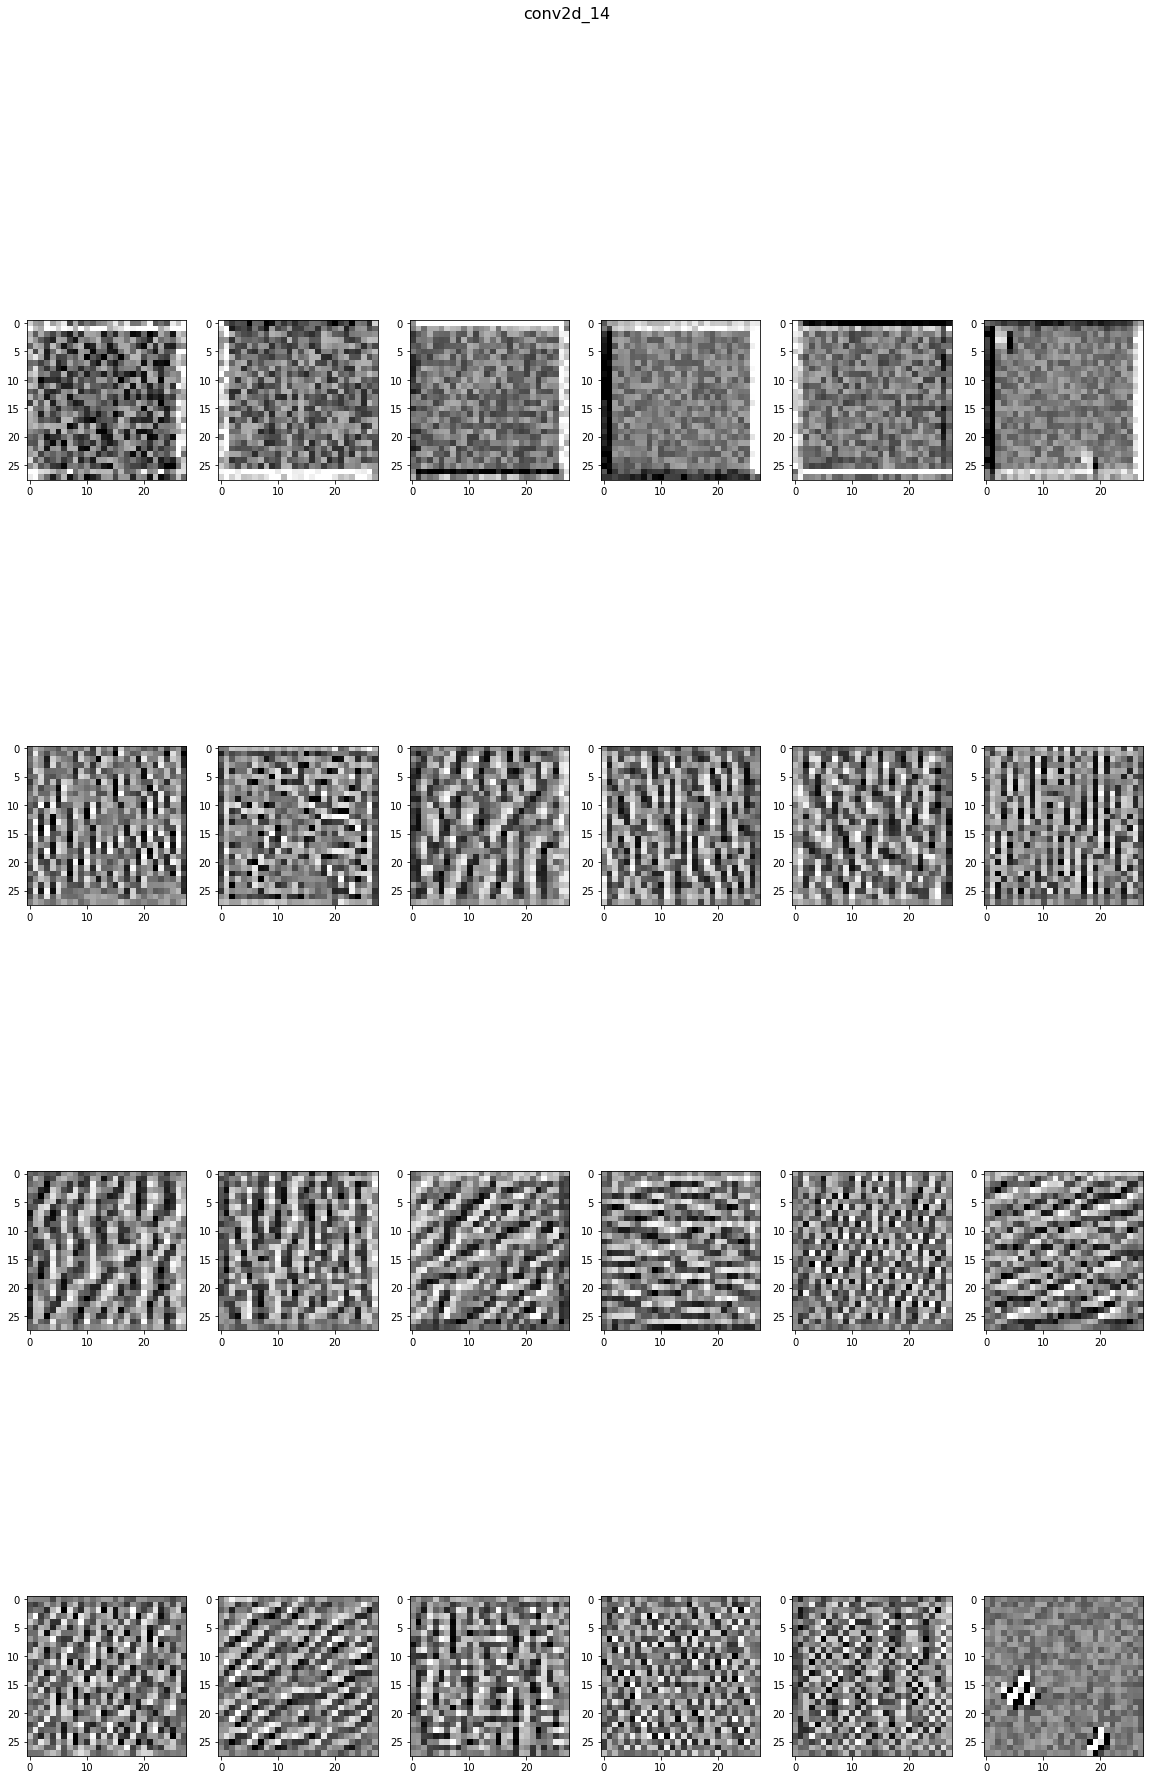

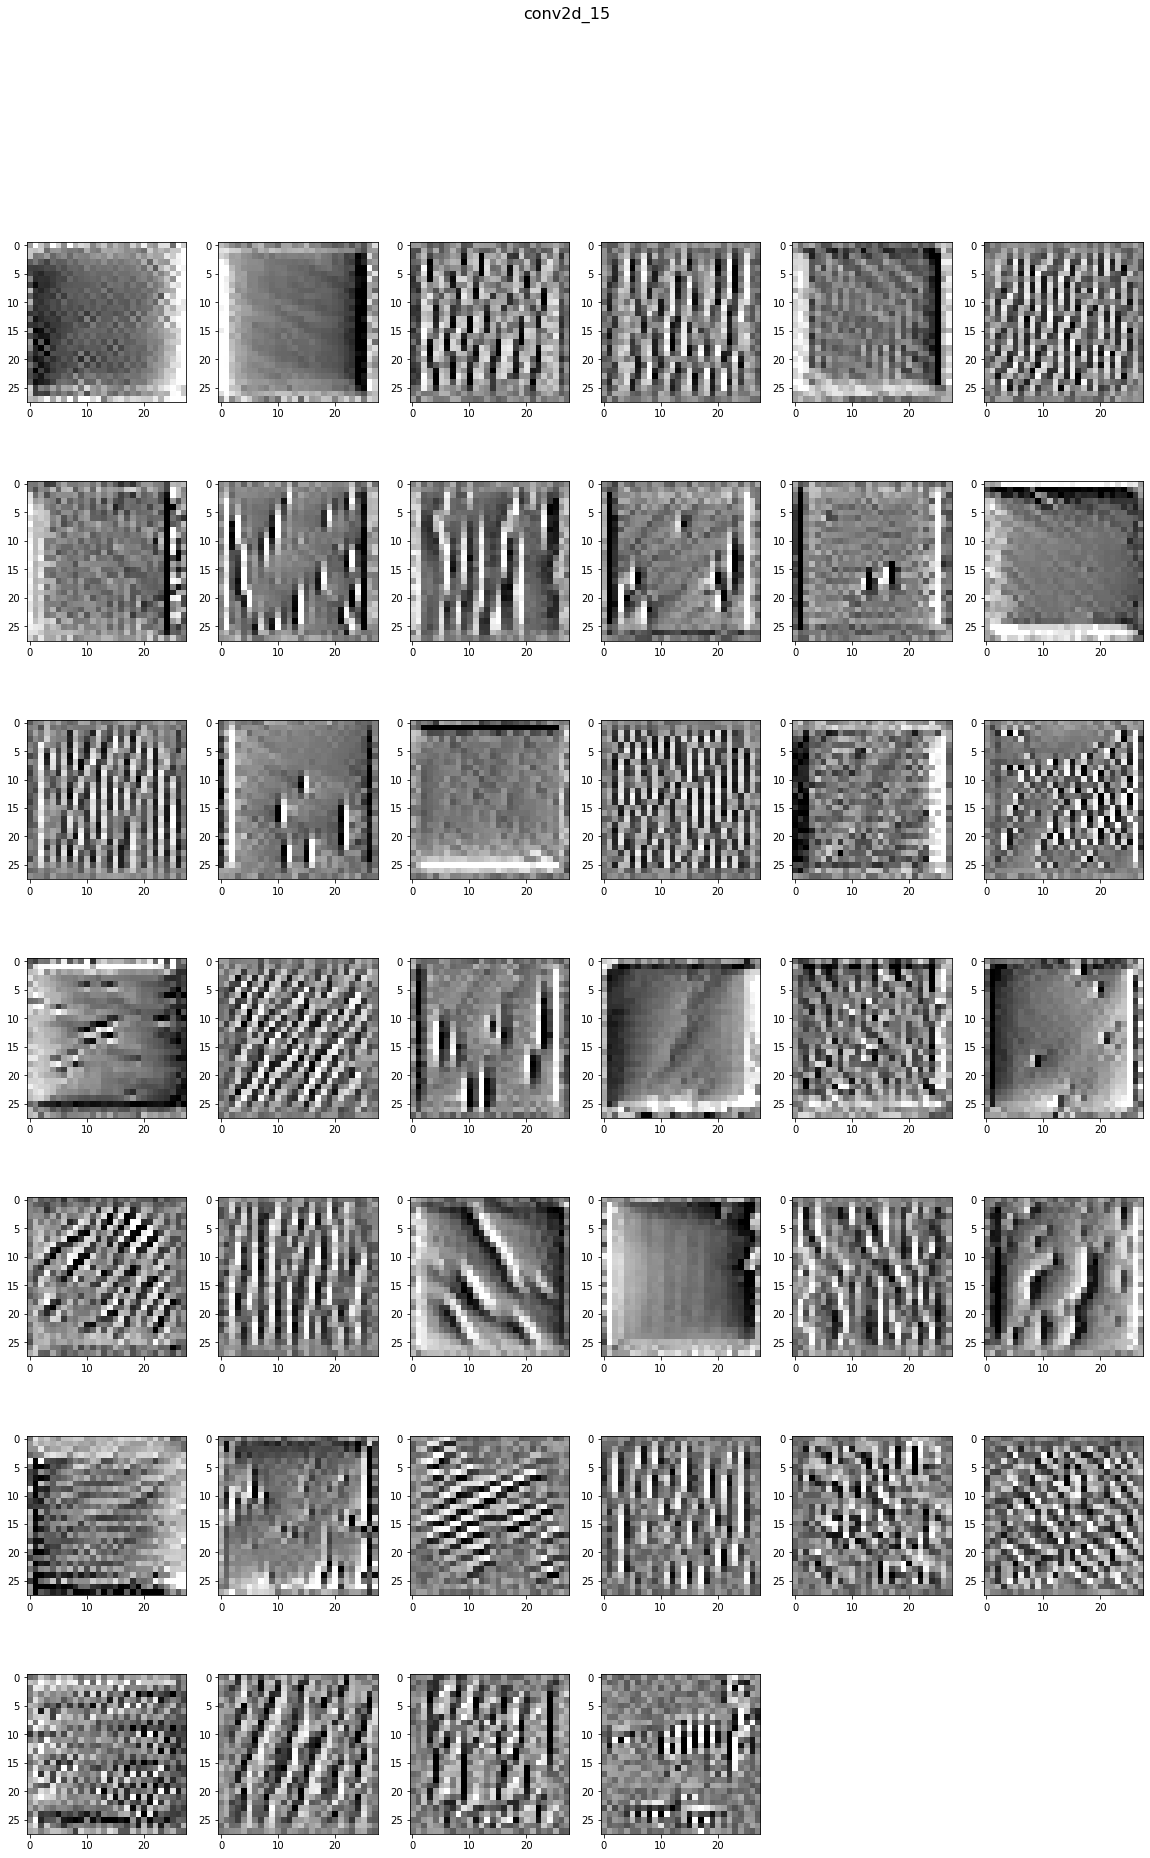

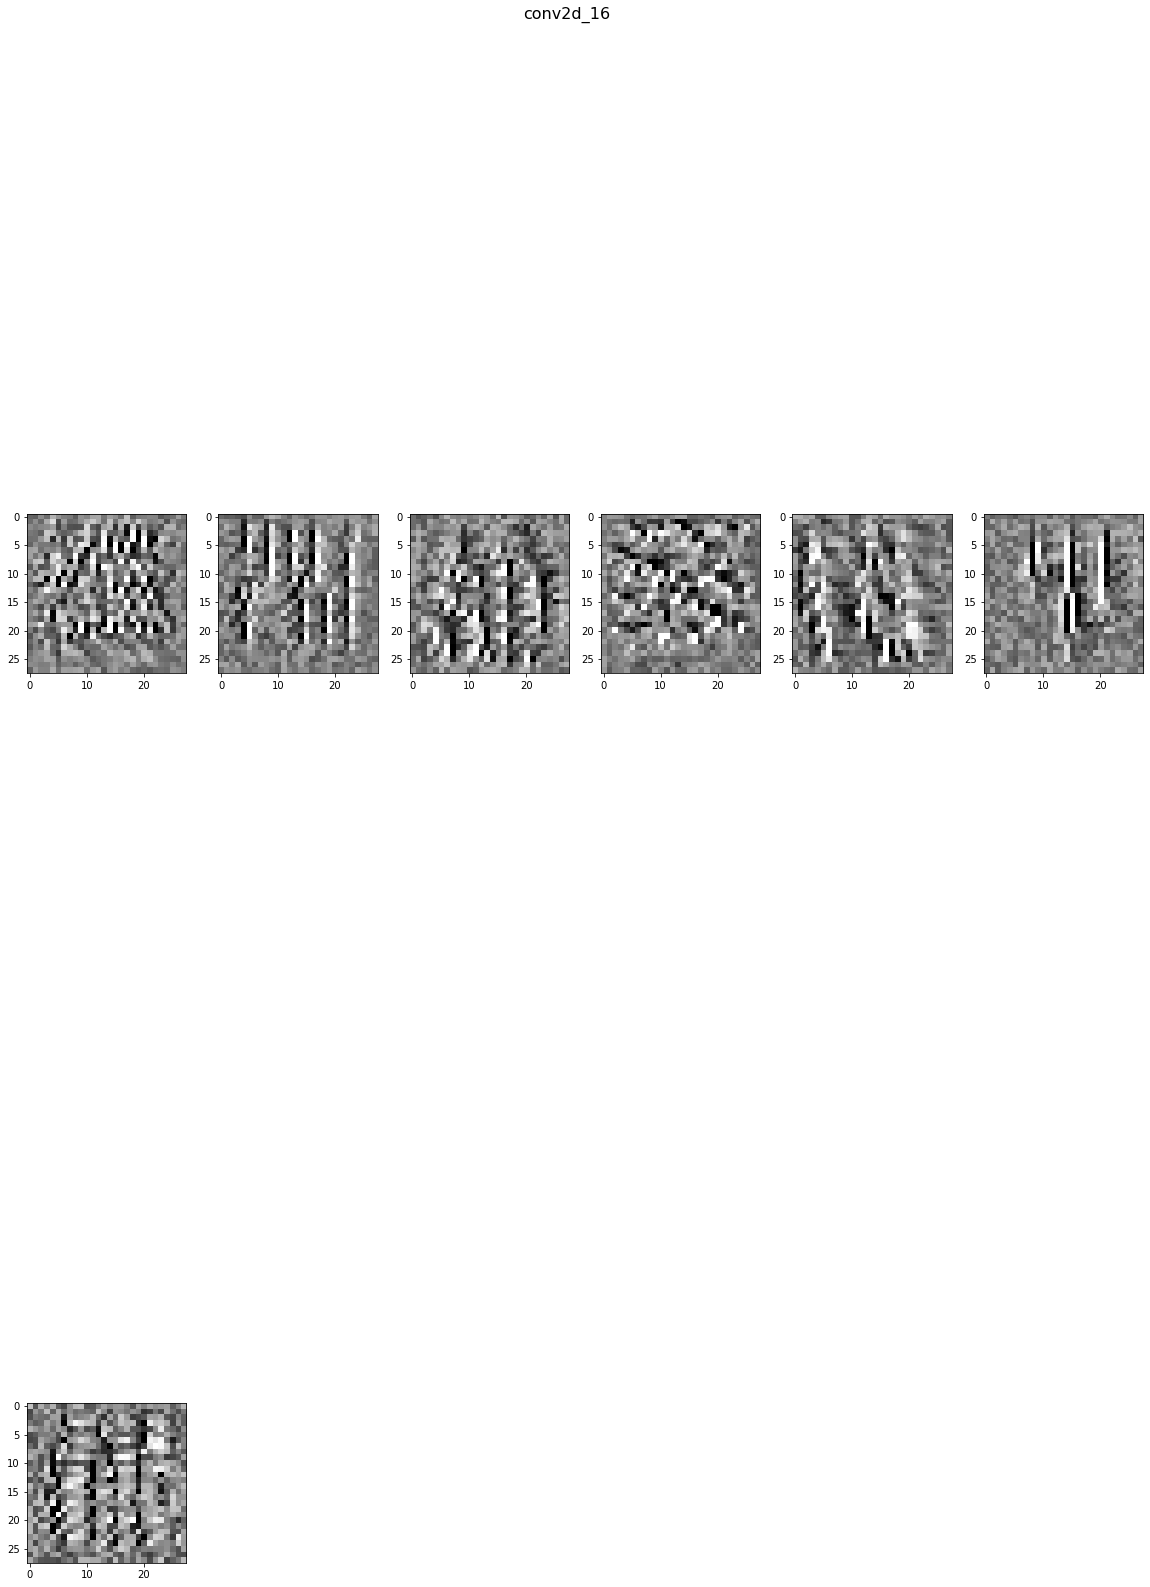

In [82]:
import matplotlib as mpl
import math

def plotFilters(pfilters):
  fig = plt.figure(figsize=(20,30))

  # Sort the filters
  pfilters.sort(key=lambda x: x[1], reverse=True)


  i = 0
  for filter, loss in pfilters:
    ax = fig.add_subplot( math.ceil(len(pfilters)/6), 6, i+1)
    
    ax.imshow(filter.reshape(28,28), cmap=mpl.cm.binary)
    i += 1

  return fig

for conv_layer in conv_layers:
  print("Plotting filters for ", conv_layer)
  fig = plotFilters( pfilters[conv_layer] )
  fig.suptitle(conv_layer, size=16)